# __1 Boston 주택 가격 예측 모델__
## __1.1 Data__  
- 보스턴 시의 주택 가격에 대한 데이터셋
- 주택의 여러 요건들과 가격 정보 포함
- 회귀분석에 자주 사용되는 대표적인 데이터셋
<br/>
- 데이터셋의 feature에 대한 설명

| Feature | Description |
|---------|-------------|
| CRIM    | 자치시별 1인당 범죄율 |
| ZN      | 25,000 평방피트를 초과하는 거주지역의 비율 |
| INDUS   | 비소매상업지역이 점유하고 있는 토지의 비율 |
| CHAS    | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |
| NOX     | 10ppm 당 농축 일산화질소 |
| RM      | 주택 1 가구당 평균 방의 개수 |
| AGE     | 1940년 이전에 건축된 소유주택의 비율 |
| DIS     | 5개의 보스턴 직업센터까지의 접근성 지수 |
| RAD     | 방사형 도로까지의 접근성 지수 |
| TAX     | 10,000 달러당 재산세율 |
| PTRATIO | 자치시별 학생/교사 비율 |
| B       | \(1000(Bk - 0.63)^2\), 여기서 \(Bk\)는 자치시별 흑인의 비율 |
| LSTAT   | 모집단의 하위계층의 비율(%) |
| MEDV    | 본인 소유의 주택가격(중앙값), 단위: $1,000 |


## __1.2 데이터 로드 및 전처리__  
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print("train 데이터셋의 크기:", len(train_data))
print("test 데이터셋의 크기:", len(test_data))

train 데이터셋의 크기: 404
test 데이터셋의 크기: 102


train에는 404개, test에는 102개의 데이터가 들어있다.

- 값의 범위가 다르면 제대로 학습시키기 어려움
- 데이터셋의 전처리를 위해 표준화 작업을 수행  

__[표준화 (Standardization)]__  $z = \frac{x - \bar{x}}{\sigma} = \frac{X - \text{Mean}(X)}{\text{StdDev}(X)}$



In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균과 표준편차를 구함.
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

# 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

❗data leakage 방지, 일관성 유지를 위해 test 데이터셋에 대해서도 train 데이터셋의 mean과 std값을 빼준다.

## __1.3 모델 구성 및 컴파일__  
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.  

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 우선 강의에 나온 내용대로 모델 구성
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
# 회귀모델이므로 활성화 함수는 없다.

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


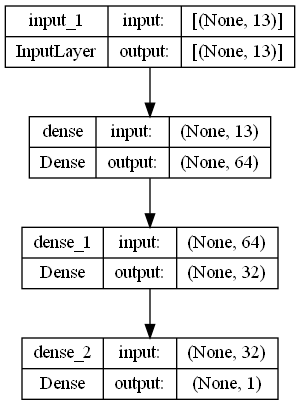

In [5]:
utils.plot_model(model, show_shapes = True)

## __1.4 모델 학습__

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=20,
                    validation_data=(test_data, test_labels))


mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

Epoch 1/60


21/21 [==============================] - 1s 10ms/step - loss: 570.9335 - mae: 22.0673 - val_loss: 567.5508 - val_mae: 21.9930
Epoch 2/60
21/21 [==============================] - 0s 2ms/step - loss: 511.3485 - mae: 20.6491 - val_loss: 506.1752 - val_mae: 20.5697
Epoch 3/60
21/21 [==============================] - 0s 3ms/step - loss: 444.6774 - mae: 19.0077 - val_loss: 427.3972 - val_mae: 18.6466
Epoch 4/60
21/21 [==============================] - 0s 2ms/step - loss: 358.4148 - mae: 16.7606 - val_loss: 327.6743 - val_mae: 16.0070
Epoch 5/60
21/21 [==============================] - 0s 2ms/step - loss: 261.7121 - mae: 13.9402 - val_loss: 230.3044 - val_mae: 13.0228
Epoch 6/60
21/21 [==============================] - 0s 2ms/step - loss: 173.5753 - mae: 10.7326 - val_loss: 149.3915 - val_mae: 10.2221
Epoch 7/60
21/21 [==============================] - 0s 2ms/step - loss: 108.7907 - mae: 7.9561 - val_loss: 98.2701 - val_mae: 7.9516
Epoch 8/60
21/21 [==============================

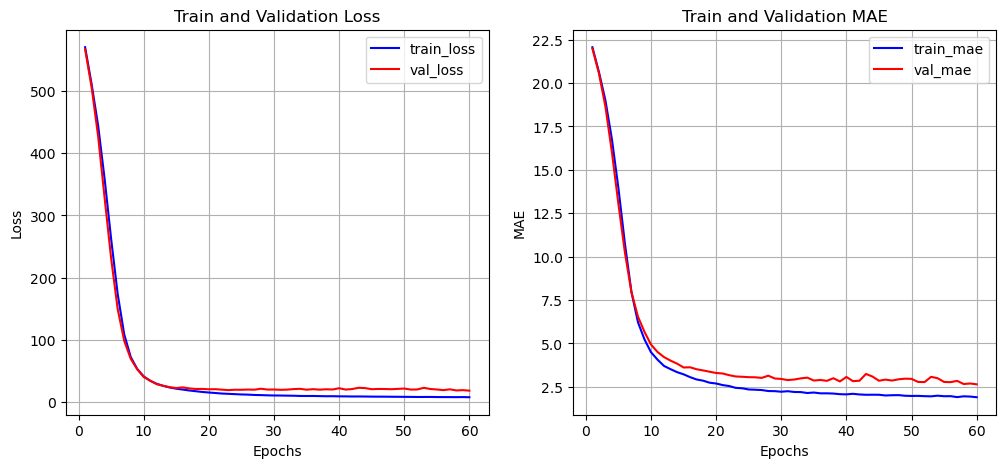

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

## __1.5 모델 평가 및 예측__

In [8]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 17.9050 - mae: 2.6439


[17.905038833618164, 2.6438679695129395]

- 에폭이 증가함에 따라 train_loss, val_loss, train_mae, val_mae가 감소하고 있다.  
- val loss와 val mae가 크지 않고 train 결과값들과 큰 차이가 없음 = 모델이 과적합되지 않음.
- 그러나 이것은 ___검증 데이터를 분리하지 않고 얻은 결과이므로___, 검증 데이터를 분리해서 다시 학습할 것이다.

In [9]:
# 위에서는 검증 데이터를 따로 분리하지 않았기 때문에, 데이터를 분리해서 학습해보자.

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)


In [10]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
# 회귀모델이므로 활성화 함수는 없다.

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=20,
                    validation_data=(x_val, y_val))


mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

Epoch 1/60
15/15 [==============================] - 1s 13ms/step - loss: 533.1778 - mae: 21.1697 - val_loss: 533.8813 - val_mae: 21.2362
Epoch 2/60
15/15 [==============================] - 0s 4ms/step - loss: 466.3410 - mae: 19.5727 - val_loss: 461.6577 - val_mae: 19.5865
Epoch 3/60
15/15 [==============================] - 0s 3ms/step - loss: 394.2242 - mae: 17.8156 - val_loss: 377.5675 - val_mae: 17.4935
Epoch 4/60
15/15 [==============================] - 0s 3ms/step - loss: 318.3777 - mae: 15.6945 - val_loss: 301.2568 - val_mae: 15.3214
Epoch 5/60
15/15 [==============================] - 0s 3ms/step - loss: 244.4283 - mae: 13.3775 - val_loss: 217.9922 - val_mae: 12.5257
Epoch 6/60
15/15 [==============================] - 0s 3ms/step - loss: 174.8043 - mae: 10.7826 - val_loss: 149.8910 - val_mae: 9.7772
Epoch 7/60
15/15 [==============================] - 0s 3ms/step - loss: 121.7445 - mae: 8.4595 - val_loss: 101.4046 - val_mae: 7.6107
Epoch 8/60
15/15 [==============================] 

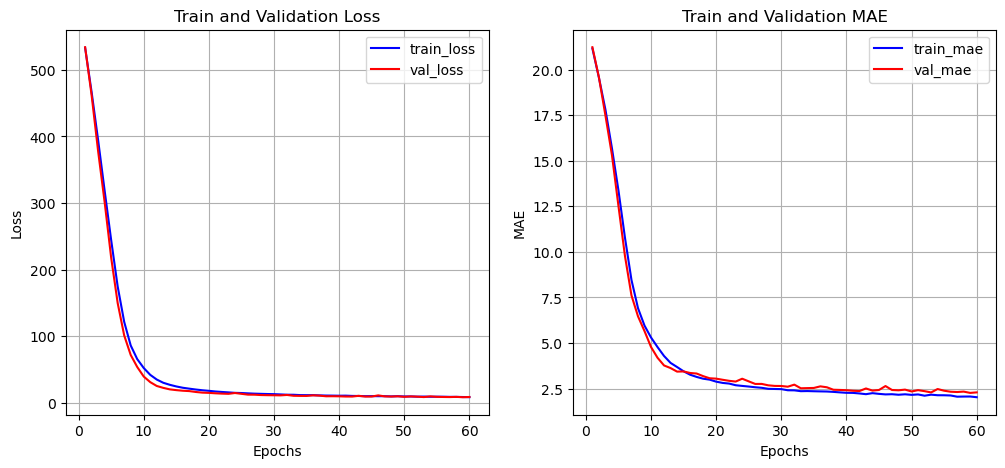

In [12]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 24.3522 - mae: 2.9832


[24.352190017700195, 2.9831836223602295]

데이터 분리 전(loss: 18.9629 - mae: 2.7766)에 비해 성능이 약간 하락했지만, 손실과 MAE가 더 빠르게 안정화되었다.

# __2 Reuters 딥러닝 모델__  

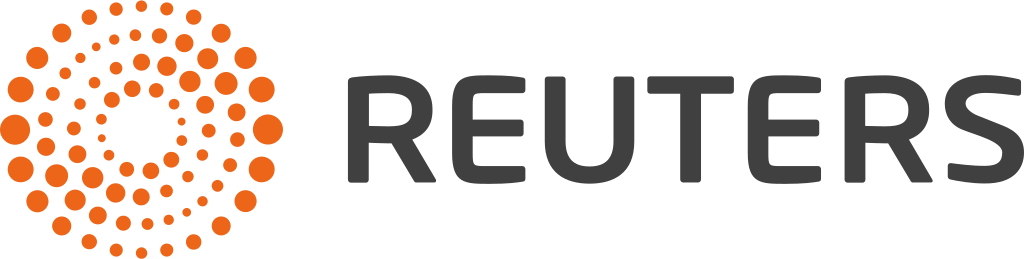
- 로이터 뉴스기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기자의 주제로 46개 레이블

## __2.1 데이터 로드 및 전처리__  
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.  
    데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라미터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [15]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,  # 25%를 검증 데이터로 분리
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"레이블 종류: {len(set(train_labels))}")

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
레이블 종류: 46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [16]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
      results[i, d] = 1.
    return results

# 입력 데이터 원-핫 인코딩
x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터 원-핫 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

## __2.2 모델 구성 및 컴파일__  
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [17]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                     

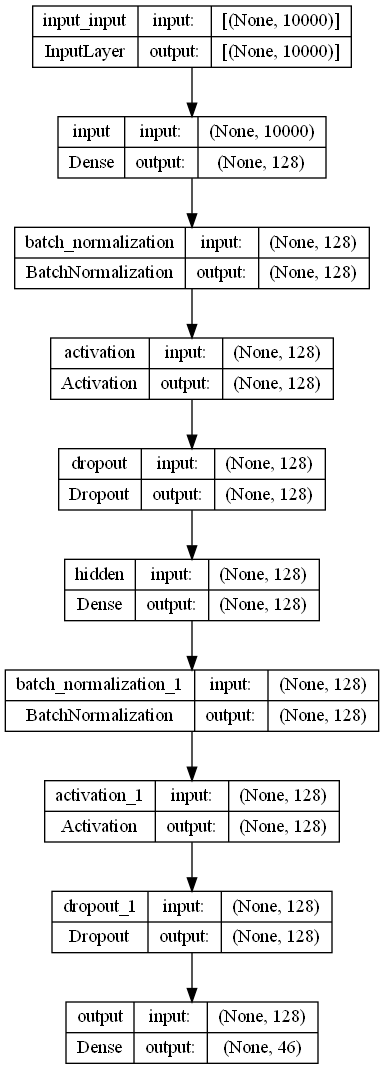

In [18]:
utils.plot_model(model, show_shapes = True)

## __2.3 모델 학습__  

In [19]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 1s 46ms/step - loss: 2.2013 - accuracy: 0.5597 - val_loss: 3.3430 - val_accuracy: 0.7066
Epoch 2/40
 9/14 [==================>...........] - ETA: 0s - loss: 1.0381 - accuracy: 0.8006

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 22ms/step - loss: 1.0256 - accuracy: 0.7997 - val_loss: 3.1149 - val_accuracy: 0.7360
Epoch 3/40
14/14 [==============================] - 0s 22ms/step - loss: 0.6744 - accuracy: 0.8625 - val_loss: 2.8279 - val_accuracy: 0.7075
Epoch 4/40
14/14 [==============================] - 0s 25ms/step - loss: 0.4958 - accuracy: 0.9014 - val_loss: 2.5469 - val_accuracy: 0.6946
Epoch 5/40
14/14 [==============================] - 0s 22ms/step - loss: 0.3620 - accuracy: 0.9271 - val_loss: 2.2598 - val_accuracy: 0.6567
Epoch 6/40
14/14 [==============================] - 0s 27ms/step - loss: 0.2831 - accuracy: 0.9425 - val_loss: 2.0050 - val_accuracy: 0.6327
Epoch 7/40
14/14 [==============================] - 0s 25ms/step - loss: 0.2271 - accuracy: 0.9525 - val_loss: 1.7595 - val_accuracy: 0.6772
Epoch 8/40
14/14 [==============================] - 0s 23ms/step - loss: 0.1890 - accuracy: 0.9593 - val_loss: 1.5913 - val_accuracy: 0.6354
Epoch 9/40
14/14 [======

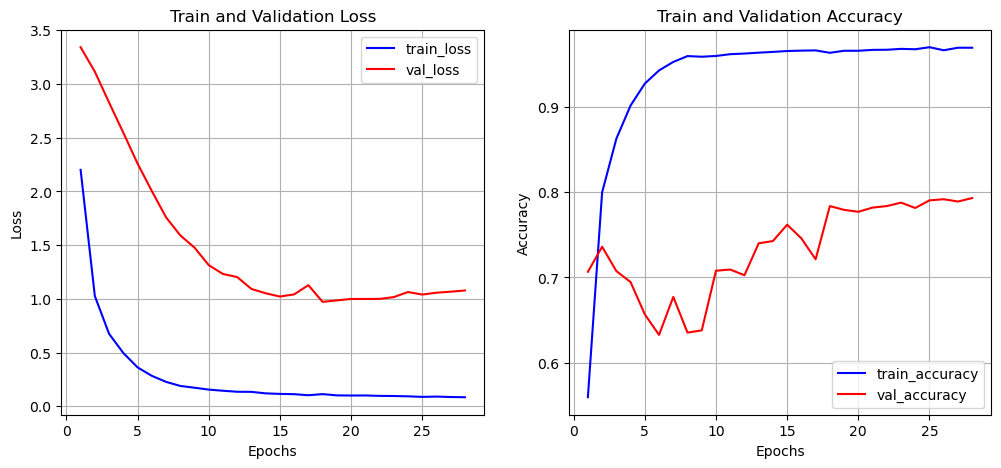

In [20]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## __2.4 모델 평가 및 예측__

In [21]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.7841


[0.9587916731834412, 0.784060537815094]

[loss 그래프]
- train_loss는 지속적으로 감소하는 반면, val_loss는 20 epoch부터 증가 추세
- validation 데이터에서 약간의 과적합

[acc 그래프]
- train data에 대한 accuracy가 거의 0.98에 이름. 훈련 데이터가 잘 학습되고 있음.
- val_acc은 초기에 불안정하다가 상승하여 0.8 부근에서 안정화, 그러나 train acc에 비해 낮은 값에서 안정화됨. 과적합 가능성

### __2.4.1 모델 복잡성 감소__

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                     

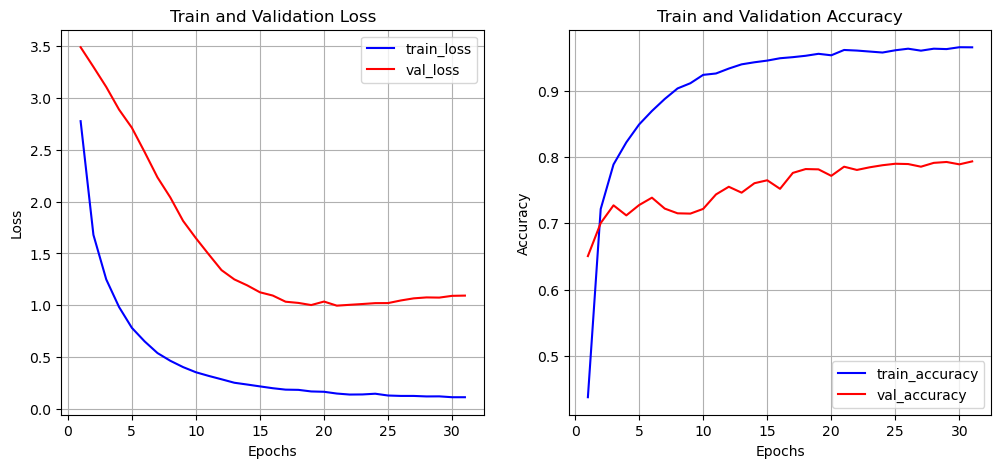

In [22]:
# 모델 복잡성 줄여 테스트
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [23]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9822 - accuracy: 0.7854


[0.9822136163711548, 0.7853962779045105]

accuracy가 약간 하락했지만 (0.7898 -> 0.7841), val_acc의 불안정성이 감소했다.

### __2.4.2 dropout 비율 조정__

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                     

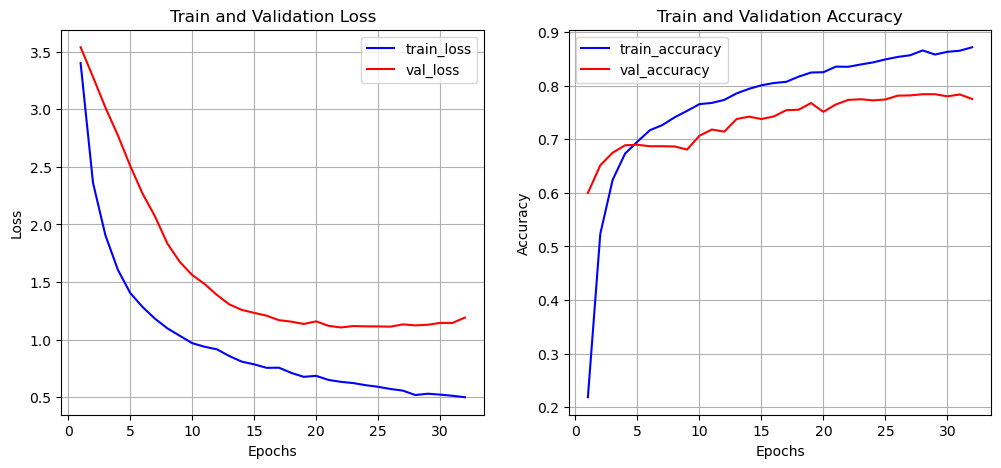

In [24]:
# 모델 복잡성 줄이고+dropout 비율 높여 테스트
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0772 - accuracy: 0.7716


[1.077189564704895, 0.7715939283370972]

이전에 비해 val_loss와 val_acc의 과적합 현상이 약간 감소함. 그래도 아직 val_loss에서 약간의 과적합이 관찰되므로, 모델을 좀 더 수정해보자.

### __2.4.3 L2 규제 추가__

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                     

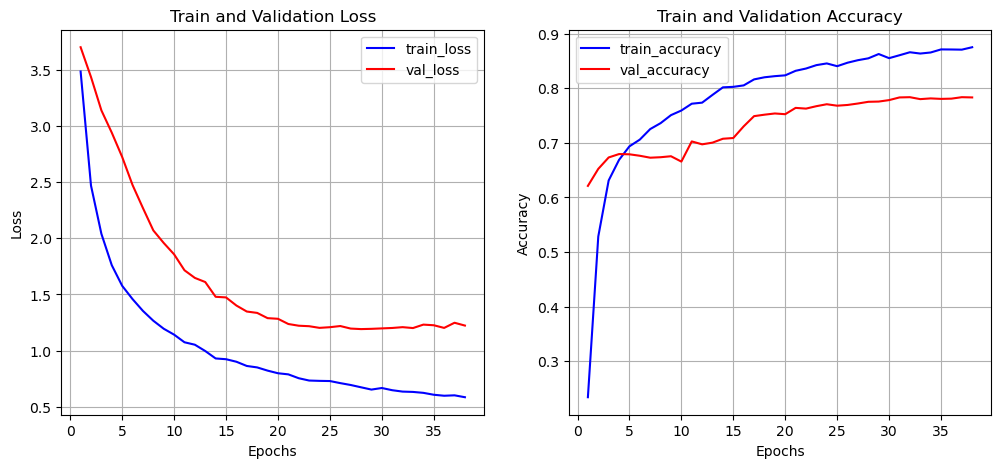

In [26]:
# 모델 복잡성 줄이고+dropout 비율 높이고+L2 규제 추가
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [27]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1669 - accuracy: 0.7743


[1.1668918132781982, 0.7742653489112854]

과적합이 약간 줄었다.

### __2.4.4 옵티마이저 변경, 학습률 조정__

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                640064    
                                                                 
 batch_normalization_8 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 64)                0         
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 hidden (Dense)              (None, 64)                4160      
                                                                 
 batch_normalization_9 (Bat  (None, 64)                256       
 chNormalization)                                     

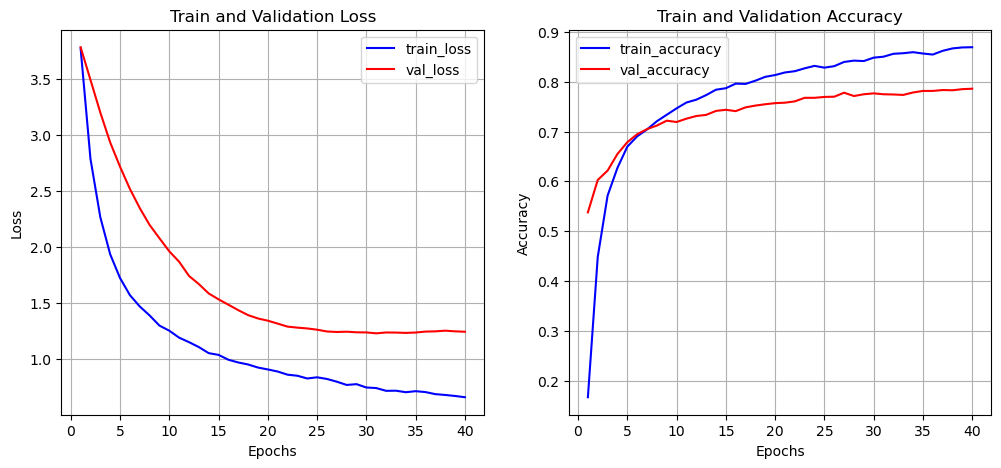

In [28]:
# 모델 복잡성 줄이고+dropout 비율 높이고+L2 규제 추가+옵티마이저 변경, 학습률 조정
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.001), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  # 0.2 -> 0.5
model.add(layers.Dense(46, activation='softmax', name='output'))

optimizer = optimizers.Adam(lr=0.001)   # optimizer를 adam으로 변경, learning rate 조절

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

check_point_cb = callbacks.ModelCheckpoint('rueters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [29]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2331 - accuracy: 0.7823


[1.2330750226974487, 0.7822796106338501]

optimizer를 adam으로 바꾸고 learning rate를 조절하니 과적합이 거의 관찰되지 않았다.

# __3 CEIFAR10 딥러닝 모델__  
## __3.1 Data__  
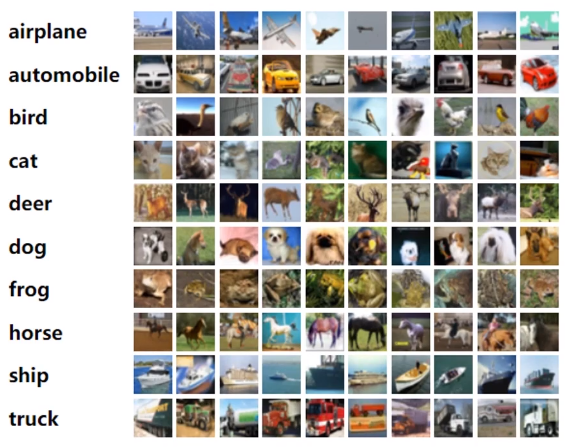
- 32x32 픽셀의 6,000개 컬러이미지 포함
- 각 이미지는 10개 클래스로 라벨링  
- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋

## __3.2 데이터 로드 및 전처리__  
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 ```keras.datasets```에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.  
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 ```train_test_split``` 함수를 활용합니다.  
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [30]:
from tensorflow.keras.datasets import cifar10

In [38]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,  # 20%를 검증 데이터로 분리
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"레이블 종류: {len(set(train_labels))}")

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
레이블 종류: 46


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [39]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

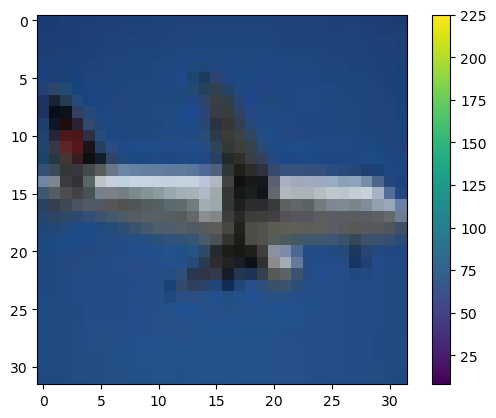

In [40]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
# plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [41]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [42]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [43]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## __3.3 모델 구성 및 컴파일__  
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성
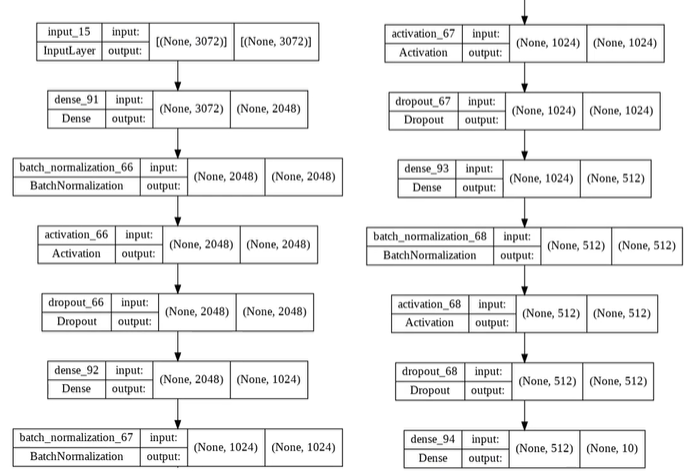

In [44]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_10 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 2048)              0         
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_11 (Ba  (None, 1024)              4096      
 tchNormalization)                                    

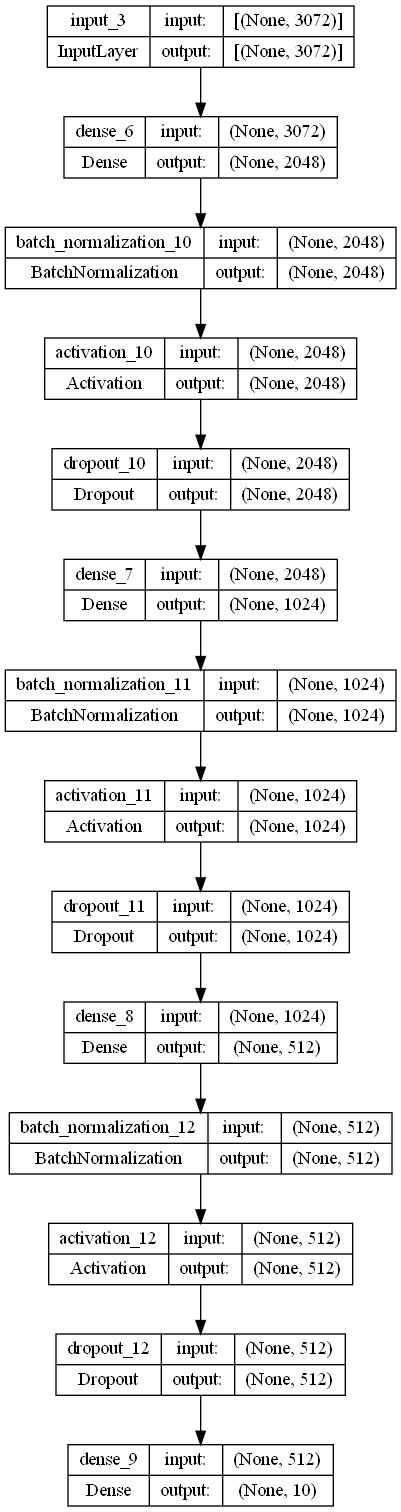

In [46]:
utils.plot_model(model, show_shapes=True)

## __3.4 모델 학습__  
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [47]:
check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 34s 26ms/step - loss: 1.9600 - accuracy: 0.3297 - val_loss: 1.8636 - val_accuracy: 0.3451
Epoch 2/60
   1/1250 [..............................] - ETA: 39s - loss: 2.0413 - accuracy: 0.2812

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 35s 28ms/step - loss: 1.6832 - accuracy: 0.4070 - val_loss: 1.8291 - val_accuracy: 0.3862
Epoch 3/60
1250/1250 [==============================] - 35s 28ms/step - loss: 1.6094 - accuracy: 0.4381 - val_loss: 1.6578 - val_accuracy: 0.4080
Epoch 4/60
1250/1250 [==============================] - 36s 29ms/step - loss: 1.5658 - accuracy: 0.4539 - val_loss: 1.5963 - val_accuracy: 0.4366
Epoch 5/60
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5375 - accuracy: 0.4660 - val_loss: 1.6708 - val_accuracy: 0.4641
Epoch 6/60
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5115 - accuracy: 0.4740 - val_loss: 1.6891 - val_accuracy: 0.4360
Epoch 7/60
1250/1250 [==============================] - 47s 38ms/step - loss: 1.5029 - accuracy: 0.4836 - val_loss: 1.5661 - val_accuracy: 0.4878
Epoch 8/60
1250/1250 [==============================] - 46s 37ms/step - loss: 1.4734 - accuracy: 0.4937 - val_loss: 1.5645 - val_accura

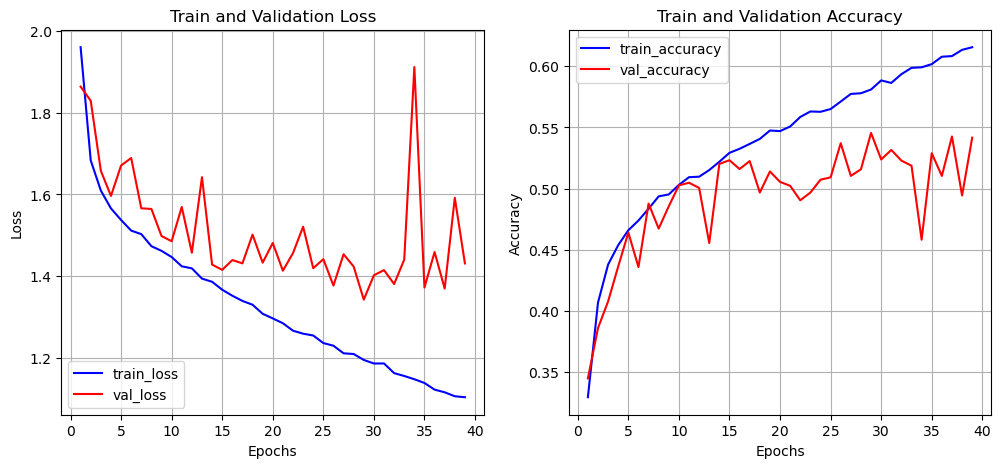

In [48]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [49]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3185 - accuracy: 0.5440


[1.3185096979141235, 0.5440000295639038]

- 정확도가 높지 않음.  
- validation data의 loss와 acc가 불안정하게 나타나고 있음.  
- 학습 데이터에 대해서는 모델 학습이 잘 진행되지만, 검증 데이터에 대해서는 그렇지 못하여 과적합이 발생하고 있거나  
    learning rate가 높아서 최적의 loss point를 지나쳤을 수 있음


Epoch 1/60
1250/1250 [==============================] - 16s 12ms/step - loss: 1.9763 - accuracy: 0.3065 - val_loss: 1.8273 - val_accuracy: 0.3531
Epoch 2/60
1250/1250 [==============================] - 16s 13ms/step - loss: 1.7147 - accuracy: 0.3927 - val_loss: 1.5882 - val_accuracy: 0.4437
Epoch 3/60
1250/1250 [==============================] - 17s 13ms/step - loss: 1.6441 - accuracy: 0.4203 - val_loss: 1.6777 - val_accuracy: 0.4142
Epoch 4/60
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6127 - accuracy: 0.4349 - val_loss: 1.6259 - val_accuracy: 0.4484
Epoch 5/60
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5849 - accuracy: 0.4469 - val_loss: 1.5939 - val_accuracy: 0.4436
Epoch 6/60
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5628 - accuracy: 0.4586 - val_loss: 1.5849 - val_accuracy: 0.4466
Epoch 7/60
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5440 - accuracy: 0.4615 - val_loss: 1.4926 -

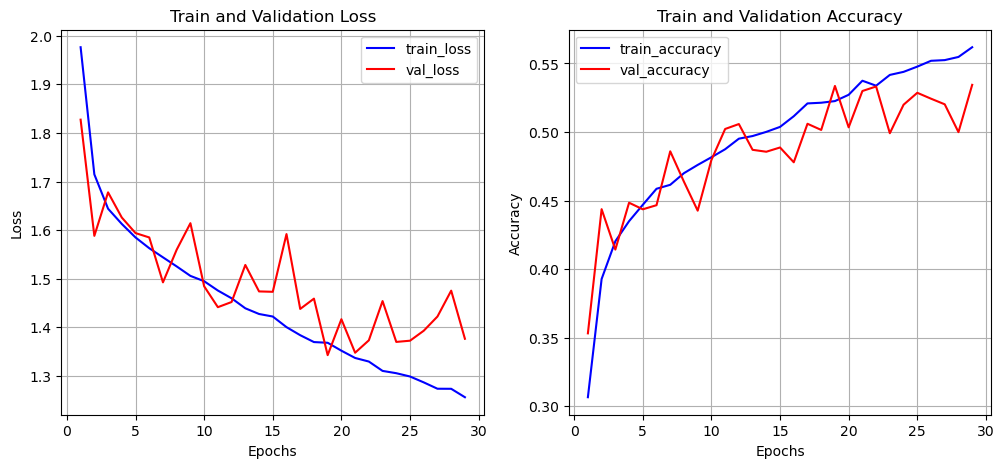

In [55]:
#모델 복잡성 줄이기
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(1024))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [57]:
model.evaluate(x_test, y_test)

 62/313 [====>.........................] - ETA: 0s - loss: 1.3220 - accuracy: 0.5418

313/313 [==============================] - 1s 3ms/step - loss: 1.3235 - accuracy: 0.5362


[1.3234926462173462, 0.5361999869346619]

이전에 비해 val 데이터의 변동성이 약간 감소하였다.

Epoch 1/60
1250/1250 [==============================] - 12s 9ms/step - loss: 2.0215 - accuracy: 0.2849 - val_loss: 1.7349 - val_accuracy: 0.3740
Epoch 2/60
   5/1250 [..............................] - ETA: 16s - loss: 1.8397 - accuracy: 0.3438

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 14s 11ms/step - loss: 1.7769 - accuracy: 0.3659 - val_loss: 1.7657 - val_accuracy: 0.3744
Epoch 3/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7050 - accuracy: 0.3979 - val_loss: 1.6206 - val_accuracy: 0.4262
Epoch 4/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6743 - accuracy: 0.4085 - val_loss: 1.5760 - val_accuracy: 0.4507
Epoch 5/60
1250/1250 [==============================] - 18s 15ms/step - loss: 1.6455 - accuracy: 0.4224 - val_loss: 1.6187 - val_accuracy: 0.4399
Epoch 6/60
1250/1250 [==============================] - 14s 12ms/step - loss: 1.6204 - accuracy: 0.4283 - val_loss: 1.6406 - val_accuracy: 0.4241
Epoch 7/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6036 - accuracy: 0.4412 - val_loss: 1.5140 - val_accuracy: 0.4732
Epoch 8/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5747 - accuracy: 0.4491 - val_loss: 1.5110 - val_accura

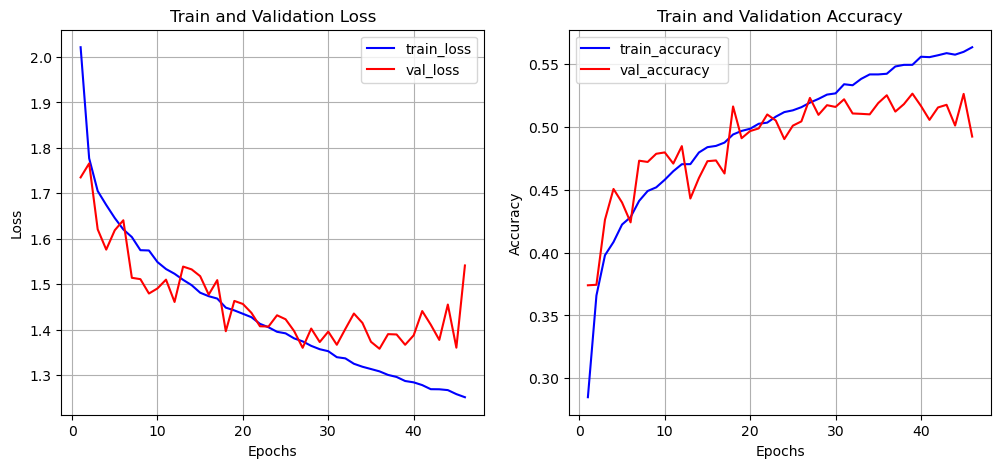

In [59]:
#모델 복잡성 더 줄이기
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

변동성이 약간 더 감소했다.

Epoch 1/60
1250/1250 [==============================] - 10s 7ms/step - loss: 2.2876 - accuracy: 0.2100 - val_loss: 1.8742 - val_accuracy: 0.3334
Epoch 2/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9682 - accuracy: 0.2840 - val_loss: 1.8320 - val_accuracy: 0.3443
Epoch 3/60
1250/1250 [==============================] - 12s 10ms/step - loss: 1.9217 - accuracy: 0.3101 - val_loss: 1.7885 - val_accuracy: 0.3671
Epoch 4/60
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8922 - accuracy: 0.3228 - val_loss: 1.8092 - val_accuracy: 0.3553
Epoch 5/60
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8709 - accuracy: 0.3306 - val_loss: 1.7205 - val_accuracy: 0.3872
Epoch 6/60
1250/1250 [==============================] - 17s 14ms/step - loss: 1.8611 - accuracy: 0.3391 - val_loss: 1.7011 - val_accuracy: 0.3905
Epoch 7/60
1250/1250 [==============================] - 17s 13ms/step - loss: 1.8439 - accuracy: 0.3456 - val_loss: 1.6776 - v

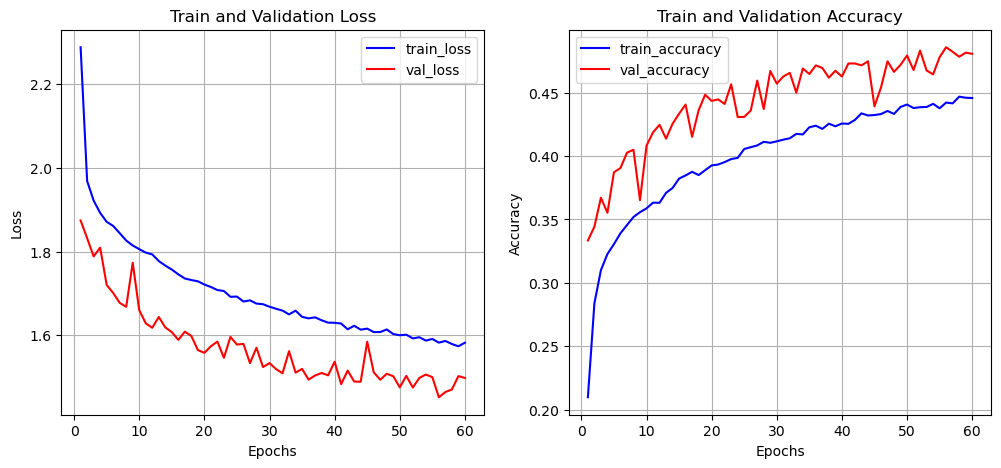

In [60]:
#모델 복잡성 줄이고 + dropout 비율 조정정
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

정확도는 떨어지지만, val 그래프의 추세가 train 그래프의 추세와 비슷해져가고 있다.

Epoch 1/60
1250/1250 [==============================] - 10s 7ms/step - loss: 2.3366 - accuracy: 0.1699 - val_loss: 1.9442 - val_accuracy: 0.2925
Epoch 2/60
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0360 - accuracy: 0.2403 - val_loss: 1.8741 - val_accuracy: 0.3034
Epoch 3/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9898 - accuracy: 0.2624 - val_loss: 1.8405 - val_accuracy: 0.3317
Epoch 4/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9635 - accuracy: 0.2725 - val_loss: 1.8318 - val_accuracy: 0.3271
Epoch 5/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9438 - accuracy: 0.2802 - val_loss: 1.8116 - val_accuracy: 0.3273
Epoch 6/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9372 - accuracy: 0.2862 - val_loss: 1.8238 - val_accuracy: 0.3258
Epoch 7/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9245 - accuracy: 0.2898 - val_loss: 1.7671 - val_accu

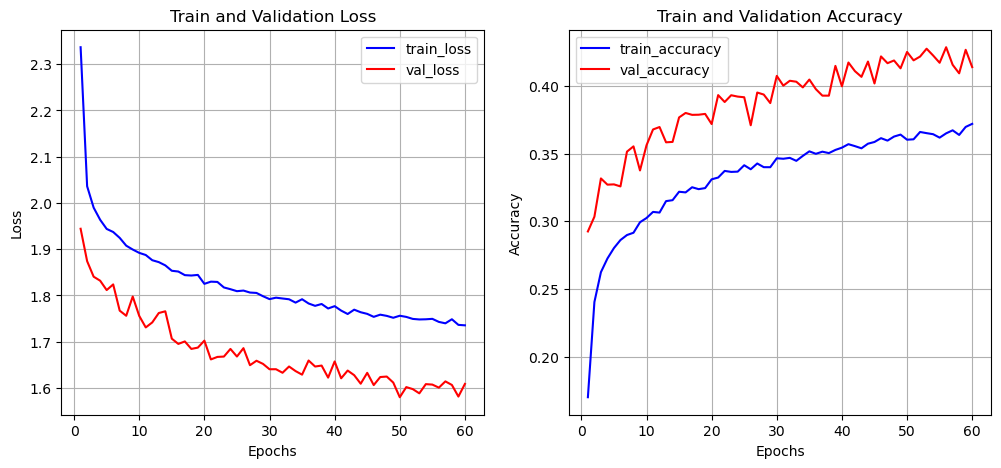

In [65]:
#모델 복잡성 더더 줄이고 + dropout 비율 조정
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(64))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

Epoch 1/60
1250/1250 [==============================] - 8s 5ms/step - loss: 2.3806 - accuracy: 0.1613 - val_loss: 2.0063 - val_accuracy: 0.2719
Epoch 2/60
  31/1250 [..............................] - ETA: 6s - loss: 2.1031 - accuracy: 0.2198

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 7s 6ms/step - loss: 2.0610 - accuracy: 0.2262 - val_loss: 1.9104 - val_accuracy: 0.2867
Epoch 3/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9957 - accuracy: 0.2546 - val_loss: 1.8719 - val_accuracy: 0.3044
Epoch 4/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9611 - accuracy: 0.2679 - val_loss: 1.8296 - val_accuracy: 0.3278
Epoch 5/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9386 - accuracy: 0.2833 - val_loss: 1.8066 - val_accuracy: 0.3370
Epoch 6/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9136 - accuracy: 0.2955 - val_loss: 1.7609 - val_accuracy: 0.3543
Epoch 7/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8967 - accuracy: 0.3031 - val_loss: 1.7579 - val_accuracy: 0.3616
Epoch 8/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8794 - accuracy: 0.3126 - val_loss: 1.7411 - val_accuracy: 0.3758
Epo

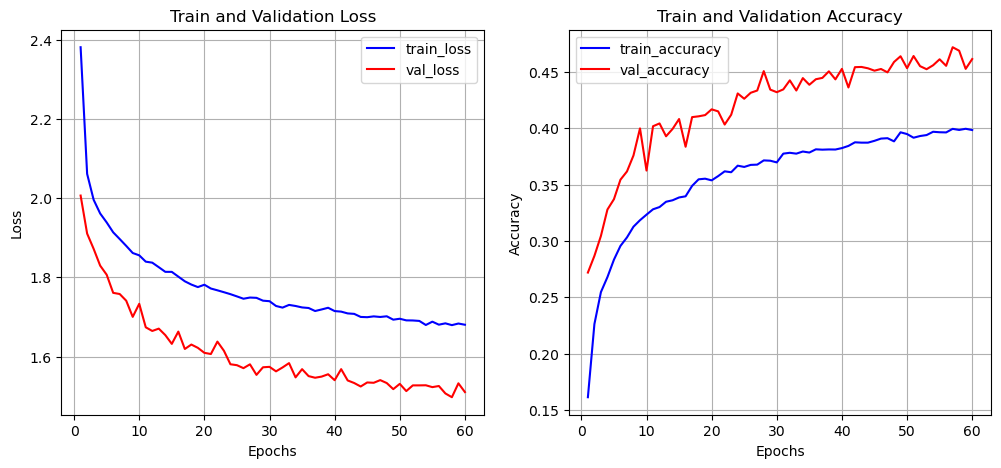

In [67]:
#모델 복잡성 더더 줄이고 + dropout 비율 조정, optimizer 변경 및 learning rate 조절

from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(64))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(10, activation='softmax'))

# Adam 옵티마이저의 학습률을 0.001로 설정
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

Epoch 1/60
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2065 - accuracy: 0.1751 - val_loss: 1.9766 - val_accuracy: 0.2542
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0555 - accuracy: 0.2166 - val_loss: 1.9030 - val_accuracy: 0.2861
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0017 - accuracy: 0.2393 - val_loss: 1.8641 - val_accuracy: 0.3069
Epoch 4/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9803 - accuracy: 0.2499 - val_loss: 1.8448 - val_accuracy: 0.3181
Epoch 5/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9630 - accuracy: 0.2591 - val_loss: 1.8299 - val_accuracy: 0.3257
Epoch 6/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9440 - accuracy: 0.2692 - val_loss: 1.7995 - val_accuracy: 0.3368
Epoch 7/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9300 - accuracy: 0.2701 - val_loss: 1.8328 - val_accuracy:

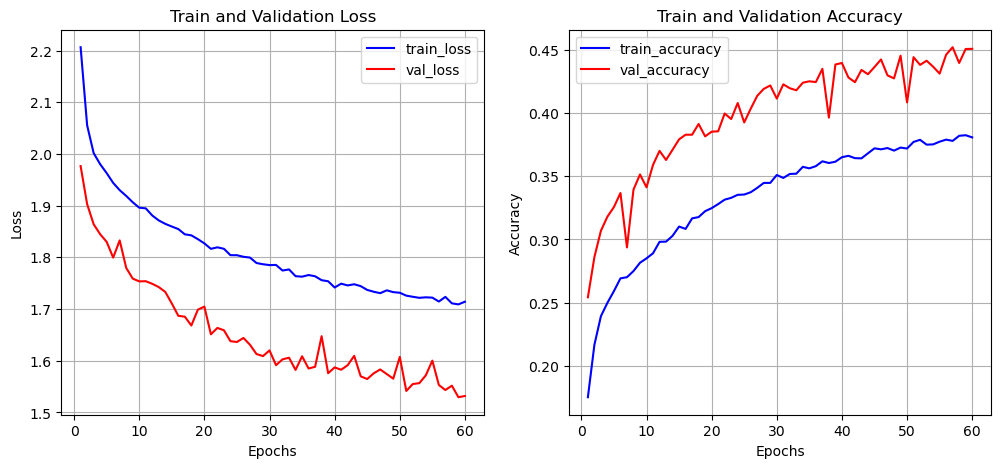

In [68]:
#모델 복잡성 더더 줄이고 + dropout 비율 조정, optimizer 변경 및 learning rate 조절

from tensorflow.keras.optimizers import SGD

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(64))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(10, activation='softmax'))

# SGD 옵티마이저를 사용하며, 학습률을 0.01로, momentum을 0.9로 설정
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

adam에 비해 SGD를 사용했을 때 좀 더 안정적이다.

Epoch 1/60
157/157 [==============================] - 3s 12ms/step - loss: 2.5023 - accuracy: 0.1347 - val_loss: 2.1484 - val_accuracy: 0.2399
Epoch 2/60
157/157 [==============================] - 2s 10ms/step - loss: 2.1655 - accuracy: 0.1836 - val_loss: 2.0516 - val_accuracy: 0.2621
Epoch 3/60
157/157 [==============================] - 2s 11ms/step - loss: 2.1035 - accuracy: 0.2053 - val_loss: 2.0167 - val_accuracy: 0.2518
Epoch 4/60
157/157 [==============================] - 2s 11ms/step - loss: 2.0655 - accuracy: 0.2155 - val_loss: 1.9551 - val_accuracy: 0.2911
Epoch 5/60
157/157 [==============================] - 2s 11ms/step - loss: 2.0343 - accuracy: 0.2248 - val_loss: 1.9403 - val_accuracy: 0.2797
Epoch 6/60
157/157 [==============================] - 2s 12ms/step - loss: 2.0124 - accuracy: 0.2353 - val_loss: 1.9004 - val_accuracy: 0.2934
Epoch 7/60
157/157 [==============================] - 2s 12ms/step - loss: 1.9975 - accuracy: 0.2392 - val_loss: 1.8854 - val_accuracy: 0.2792

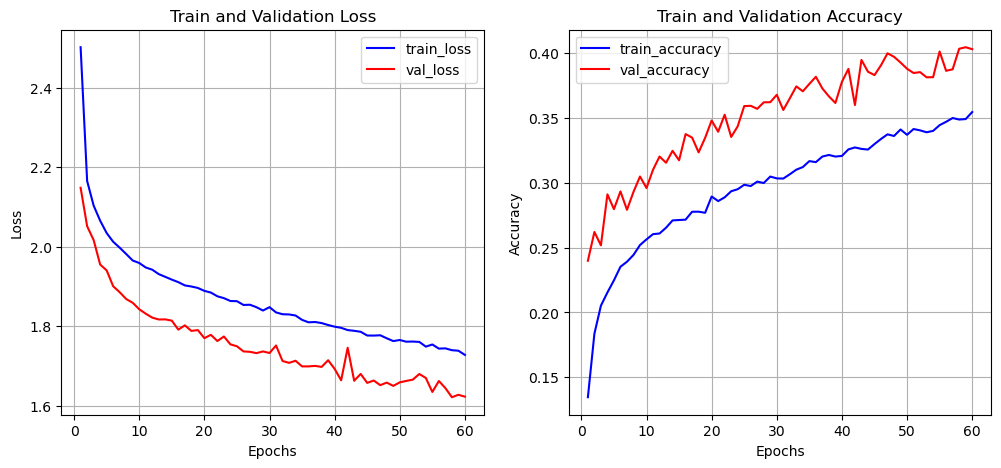

In [70]:
#모델 복잡성 더더 줄이고 + dropout 비율 조정, optimizer 변경 및 learning rate 조절, batch_size 조정

from tensorflow.keras.optimizers import SGD

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(256))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(128))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(64))   # 복잡성 감소
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.7))   # dropout 비율 증가
model.add(layers.Dense(10, activation='softmax'))

# SGD 옵티마이저를 사용하며, 학습률을 0.01로, momentum을 0.9로 설정
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60, batch_size = 256,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

val 그래프의 변동성이 가장 안정하다.

# __회고__  
배운 한도 내에서 어떻게든 validation loss랑 accuracy를 안정화 시켜보려고 노력했습니다만 쉽지 않네요...😅  
그리고 과적합을 방지하기 위한 방법들을 사용하면 성능도 같이 하락하는데 이 부분은 어떻게 보완할 수 있을지 찾아봐야 할 것 같습니다.  
물론 과적합이 안되게 하는거니까 성능이 떨어지는 건 당연한 문제인가 싶긴한데 왠지 그렇게 단순한 문제는 아닐 것 같다는 생각이 드네요🤔
한편 앞으로 배우는 방법들로 어떻게 이 문제들을 해결할 수 있을지 기대가 됩니다.  

